(cat-data-notebook)=
# Dati non gaussiani e categoriali

In [1]:
source("../_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semPlot")
    library("knitr")
    library("markdown")
    library("patchwork")
    library("here")
})

Negli esempi precedenti di questa dispensa è stato utilizzato lo stimatore di massima verosimiglianza (ML). Molti dei modelli CFA e SEM riportati nella letteratura di ricerca applicata utilizzano infatti stime di ML. Tuttavia, lo stimatore ML è appropriata solo per dati multivariati normali a livello di scala a intervalli (cioè, quando la distribuzione congiunta delle variabili continue è distribuita normalmente). Quando i dati continui si discostano marcatamente dalla normalità (cioè, mostrano una forte asimmetria o curtosi), o quando alcuni degli indicatori non sono a livello di scala a intervalli (cioè, dati binari, politomici o ordinali), allora è preferibile usare uno stimatore diverso da quello di ML.

## Dati non gaussiani

La ricerca ha evidenziato che la stima di massima verosimiglianza (ML) rimane robusta di fronte a piccole deviazioni dalla normalità. Tuttavia, in presenza di una non normalità più marcata, si rende necessario l'uso di stimatori alternativi a ML per garantire l'affidabilità statistica, sia in termini di accuratezza delle statistiche di bontà di adattamento sia per gli errori standard delle stime dei parametri. La stima ML è particolarmente vulnerabile in presenza di un'elevata curtosi.

Utilizzare ML in condizioni di forte non normalità porta a conseguenze quali:

- Sovrastima della statistica chi-quadrato ($\chi^2$) del modello;
- Sottostima degli indici di bontà di adattamento come TLI (Tucker-Lewis Index) e CFI (Comparative Fit Index);
- Sottostima degli errori standard delle stime dei parametri.

Questi effetti negativi sono amplificati quando la dimensione del campione è ridotta.

Per mitigare queste conseguenze in situazioni di grave violazione dell'assunzione di normalità multivariata, si utilizzano stimatori differenti da ML. Tra questi, i più noti sono:

Certamente, esaminerò ciascuno di questi stimatori in modo più approfondito, cercando di rendere la spiegazione tecnica più accessibile:

1. **GLS (Generalized Least Squares)**: 
   - **Uso**: Adatto per dati completi senza valori mancanti.
   - **Funzione di Discrepanza**: La funzione di discrepanza del GLS misura quanto la matrice di covarianza stimata dal modello ($\Sigma(\theta)$) si differenzia dalla matrice di covarianza osservata ($S$). La formula $F_{\text{GLS}}(S, \Sigma(\theta)) = \frac{1}{2} \text{traccia}(S - \Sigma(\theta))^2$ utilizza la traccia (la somma degli elementi sulla diagonale principale della matrice) per quantificare questa differenza.
   - **Interpretazione**: Un valore più basso della funzione di discrepanza indica un migliore adattamento del modello ai dati.

2. **WLS (Weighted Least Squares)**: 
   - **Uso**: Conosciuto come stimatore Asintoticamente Libero da Distribuzione (ADF), utile per dati complessi.
   - **Funzione di Discrepanza**: $F_{\text{ADF}}(S, \Sigma(\theta)) = \text{vecs}(S - \Sigma(\theta))'W\text{vecs}(S - \Sigma(\theta))$. Qui, `vecs()` trasforma la matrice di covarianza in un vettore (prendendo solo la parte inferiore della matrice), e `W` è una matrice di pesi che dà diversa importanza ai vari elementi nel calcolo della discrepanza.
   - **Interpretazione**: Un valore più basso indica che il modello si adatta meglio ai dati, tenendo conto della ponderazione specifica di `W`.

3. **DWLS (Diagonally Weighted Least Squares)**: 
   - **Uso**: Una versione semplificata di WLS.
   - **Funzione di Discrepanza**: $F_{\text{DWLS}}(S, \Sigma(\theta)) = \text{vecs}(S - \Sigma(\theta))'D\text{vecs}(S - \Sigma(\theta))$, dove `D` è una matrice di pesi diagonale.
   - **Interpretazione**: Simile a WLS, ma semplifica i calcoli usando solo una matrice di pesi diagonale, che considera solo gli elementi sulla diagonale della matrice di covarianza.

4. **ULS (Unweighted Least Squares)**: 
   - **Uso**: Considerato un caso speciale di WLS.
   - **Funzione di Discrepanza**: $F_{\text{ULS}}(S, \Sigma(\theta)) = \text{vecs}(S - \Sigma(\theta))'\text{vecs}(S - \Sigma(\theta))$. Qui, si utilizza una matrice di identità come peso, il che significa che tutti gli elementi hanno lo stesso peso nel calcolo della discrepanza.
   - **Interpretazione**: Un approccio più diretto rispetto a WLS, che non pondera gli elementi in modo diverso. Un valore più basso indica un migliore adattamento del modello.

In sintesi, questi stimatori vengono utilizzati per valutare quanto bene un modello SEM si adatti ai dati. Differiscono nel modo in cui trattano le discrepanze tra i dati osservati e quelli stimati dal modello, e ciascuno ha specifiche situazioni in cui risulta più appropriato.

Oltre ai quattro metodi di stima già menzionati (GLS, WLS, DWLS, ULS), un altro stimatore importante nel contesto del Structural Equation Modeling (SEM) è il **ML Robusto** (Robust Maximum Likelihood). Questo stimatore è una variazione della stima di massima verosimiglianza tradizionale, progettato per essere più affidabile in presenza di violazioni dell'assunzione di normalità multivariata.

Il ML Robusto si adatta a situazioni in cui la distribuzione dei dati non rispetta pienamente l'ipotesi di normalità, in particolare quando si verifica un eccesso di curtosi. Questo stimatore è utile perché:

- **Corregge la Sovrastima di Chi-Quadrato ($\chi^2$):** Il ML tradizionale può portare a una sovrastima della statistica $\chi^2$ in presenza di non normalità. Il ML Robusto fornisce una correzione a questo problema, offrendo una misura più accurata del fit del modello.
  
- **Errore Standard Affidabile:** Fornisce stime degli errori standard dei parametri che sono più accurate in condizioni di non normalità, a differenza del ML tradizionale che tende a sottostimarli.

- **Miglioramento degli Indici di Bontà di Adattamento:** Rispetto al ML tradizionale, il ML Robusto può offrire una valutazione più accurata degli indici di bontà di adattamento, come il Tucker-Lewis Index (TLI) e il Comparative Fit Index (CFI), che sono fondamentali per valutare la qualità del modello SEM.

Il ML Robusto funziona modificando la stima degli errori standard e la statistica test del $\chi^2$ per tener conto della non normalità. Questo approccio permette agli analisti di utilizzare la metodologia SEM in una gamma più ampia di scenari di dati, rendendo l'analisi più flessibile e robusta. Per questi motivi, il ML Robusto è diventato un'opzione popolare nell'analisi SEM, soprattutto quando i dati non rispettano perfettamente le assunzioni di normalità multivariata.

I due stimatori più comunemente usati per dati continui non normali sono ML robusto e minimi quadrati ponderati (WLS). L'uso di WLS non è, in generale, raccomandato, a meno che le dimensioni del campione non siano molto grandi. Al contrario, la ricerca ha dimostrato che il metodo ML robusto fornisce uno stimatore adeguato rispetto a diversi livelli di non normalità. 

Esaminiamo qui un esempio discusso da {cite:t}`brown2015confirmatory` nelle sue tabelle 9.5 -- 9.7. 

In [2]:
d <- readRDS(here::here("data", "brown_table_9_5_data.RDS"))
head(d)

,x1,x2,x3,x4,x5
,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,4,2,2,1,1
5,1,0,1,6,0
6,0,0,0,0,0


Le statistiche descrittive di questo campione di dati mostrano valori eccessivi di asimmetria e di curtosi.

In [3]:
psych::describe(d)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,870,1.4701149,2.172832,0,1.0086207,0,0,8,8,1.506406,1.252591,0.07366591
x2,2,870,0.8229885,1.601474,0,0.4152299,0,0,8,8,2.398394,5.670143,0.05429505
x3,3,870,1.2655172,2.070024,0,0.7772989,0,0,8,8,1.797942,2.343203,0.07018040
x4,4,870,1.0264368,1.928047,0,0.5359195,0,0,8,8,2.157445,3.977564,0.06536693
x5,5,870,0.6068966,1.519175,0,0.1839080,0,0,8,8,3.103965,9.373781,0.05150485


Definiamo un modello ad un fattore e, seguendo {cite:t}`brown2015confirmatory`, aggiungiamo una correlazione residua tra gli indicatori `X1` e `X3`:

In [4]:
model <- '
  f1 =~ x1 + x2 + x3 + x4 + x5
  x1 ~~ x3 
'

Procediamo alla stima dei parametri utilizzando uno stimatore di ML robusto. La sintassi `lavaan` è la seguente:

In [5]:
fit <- cfa(model, data = d, mimic = "MPLUS", estimator = "MLM")

Per esaminare la soluzione ottenuta ci focalizziamo sulla statistica $\chi^2$ -- si consideri la soluzione robusta fornita nell'output.

In [6]:
out <- summary(fit)
print(out)

lavaan 0.6.17 ended normally after 28 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        16

  Number of observations                           870

Model Test User Model:
                                               Standard      Scaled
  Test Statistic                                 25.913      10.356
  Degrees of freedom                                  4           4
  P-value (Chi-square)                            0.000       0.035
  Scaling correction factor                                   2.502
    Satorra-Bentler correction (Mplus variant)                     

Parameter Estimates:

  Standard errors                           Robust.sem
  Information                                 Expected
  Information saturated (h1) model          Structured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)
  f1 =~                            

Per fare un confronto, adattiamo lo stesso modello ai dati usando lo stimatore di ML.

In [7]:
fit2 <- cfa(model, data = d)

Notiamo come il valore della statistica $\chi^2$ ora ottenuto sia molto maggiore di quello trovato in precedenza.

In [8]:
out <- summary(fit2)
print(out)

lavaan 0.6.17 ended normally after 28 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        11

  Number of observations                           870

Model Test User Model:
                                                      
  Test statistic                                25.913
  Degrees of freedom                                 4
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)
  f1 =~                                               
    x1                1.000                           
    x2                0.703    0.035   20.133    0.000
    x3                1.068    0.034   31.730    0.000
   

## Dati categoriali

Nella nostra discussione precedente, abbiamo esplorato il modello SEM partendo dall'ipotesi che i dati fossero continui e distribuiti secondo una normale multivariata congiunta. In questo capitolo, abbiamo allentato tale ipotesi e esaminato la stima robusta per dati non normalmente distribuiti. Tuttavia, è importante riconoscere che la maggior parte dei dati raccolti per l'analisi fattoriale confermativa (CFA) o SEM proviene da questionari e scale di tipo Likert, che generano dati categoriali (come binari, ordinali e nominali). Questi dati hanno una natura ordinale e non sono continui. 

Quando si lavora con almeno un indicatore categoriale (binario, politomico o ordinale), il metodo di massima verosimiglianza (ML) ordinario non dovrebbe essere impiegato per stimare i modelli CFA/SEM. Trattare variabili categoriali come se fossero continue può avere diverse conseguenze negative, tra cui:

- **Stime Attenuate delle Relazioni**: Le relazioni tra gli indicatori possono risultare attenuate, specialmente in presenza di effetti pavimento o soffitto (floor or ceiling effects).
- **Emergenza di "Pseudo-Fattori"**: Possono emergere fattori artefatti, non veri e propri costrutti, ma risultati del metodo statistico utilizzato.
- **Distorsione degli Indici di Bontà di Adattamento e delle Stime degli Errori Standard**: Gli indici che valutano la qualità dell'adattamento del modello possono essere distorti, così come le stime degli errori standard.
- **Stime Errate dei Parametri**: I parametri del modello potrebbero essere stimati in modo inaccurato.

Per affrontare questi problemi, esistono vari stimatori specifici per i dati categoriali. Alcuni esempi includono:

- **WLS (Weighted Least Squares)**: Adatto per dati categoriali, tenendo conto del loro peso specifico.
- **WLSMV (Weighted Least Squares Mean and Variance Adjusted)**: Una versione modificata di WLS che si adatta meglio alle peculiarità dei dati categoriali.
- **ULS (Unweighted Least Squares)**: Non prevede ponderazioni, utile per dati categoriali senza presupporre pesi specifici.

Nelle sezioni successive, discuteremo in dettaglio l'approccio SEM per dati categoriali, evidenziando le specificità e le migliori pratiche per gestire questo tipo di dati nelle analisi SEM. Questo approccio ci permette di fare inferenze più accurate da dati categoriali, preservando l'integrità e la validità delle conclusioni tratte dalle analisi SEM.

### Un esempio concreto

Nell'esempio discusso da {cite:t}`brown2015confirmatory`, i ricercatori desiderano verificare un modello uni-fattoriale di dipendenza da alcol in un campione di 750 pazienti ambulatoriali. Gli indicatori di alcolismo sono item binari che riflettono la presenza/assenza di sei criteri diagnostici per l'alcolismo (0 = criterio non soddisfatto, 1 = criterio soddisfatto). I dati sono i seguenti:

In [9]:
d1 <- readRDS(here::here("data", "brown_table_9_9_data.RDS"))
head(d1)

,y1,y2,y3,y4,y5,y6
,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,0
4,1,1,1,1,1,1
5,0,0,0,0,0,0
6,1,1,0,1,1,1


È possibile evidenziare la natura ordinale dei dati esaminando le tabelle bivariate che mostrano la frequenza di combinazioni specifiche tra due variabili. 

In [10]:
xtabs(~ y1 + y2, d1)

   y2
y1    0   1
  0 103  65
  1 156 426

In [11]:
xtabs(~ y3 + y4, d1)

   y4
y3    0   1
  0  41  39
  1 119 551

In [12]:
xtabs(~ y5 + y6, d1)

   y6
y5    0   1
  0  95 168
  1  60 427

Nelle tabelle precedenti, possiamo vedere che ci sono più casi dove entrambe le variabili sono 1 rispetto a quando entrambe sono 0 o quando una è 1 e l'altra è 0. Questo indicare una relazione ordinale tra queste coppie di variabili nel dataset.

### Il Modello Basato sulle Soglie per Risposte Categoriali Ordinate

La teoria fondamentale dietro il modello basato sulle soglie per risposte categoriali ordinate si fonda sull'idea che le risposte di una variabile categoriale possano essere concepite come generate da una corrispondente variabile continua sottostante, normalmente distribuita. Questa variabile continua sottostante è una variabile latente e non osservata che rappresenta la propensione a rispondere in una certa direzione. Le risposte categoriali sono considerate misurazioni approssimative di queste variabili continue latenti non osservate.

Le soglie (o punti di scala), che suddividono l'intera gamma della scala continua latente in un numero finito di categorie, sono utilizzate per definire la mappatura delle risposte di propensione latente alle risposte categoriali osservate.

Per illustrare, prendiamo come esempio lo strumento di misurazione costituito da item strutturati su una scala Likert a 7 punti, rappresentando così una variabile categoriale con sette classi ordinali. Poniamo che I denoti genericamente un item, e I* rappresenti la variabile continua sottostante non osservata corrispondente a I. La relazione tra I e I* è descritta dal seguente insieme di equazioni:

$$
\begin{align*}
I &= 1 \quad \text{se} \quad -\infty < I^* \leq t_1 \\
I &= 2 \quad \text{se} \quad t_1 < I^* \leq t_2 \\
I &= 3 \quad \text{se} \quad t_2 < I^* \leq t_3 \\
I &= 4 \quad \text{se} \quad t_3 < I^* \leq t_4 \\
I &= 5 \quad \text{se} \quad t_4 < I^* \leq t_5 \\
I &= 6 \quad \text{se} \quad t_5 < I^* \leq t_6 \\
I &= 7 \quad \text{se} \quad t_6 < I^* < \infty
\end{align*}
$$

dove $t_i (i = 1,\dots,6; −\infty <t_1 <t_2 <t_3 <t_4 <t_5 <t_6 < \infty)$ sono soglie che definiscono regioni di I* per produrre le risposte categoriali I. Il numero di soglie è sempre uno in meno rispetto al numero di categorie, simile al numero di variabili fittizie necessarie per codificare una variabile di classificazione nell'analisi di regressione classica.

Il processo di categorizzazione di I* è anche illustrato graficamente nella seguente figura. In questa figura, la variabile continua latente sottostante I* è una distribuzione normale standard rappresentata dalla curva nera. Le sei linee verticali sono le soglie ipotetiche con t1 a t6 segnate in cima alle linee. Le possibili categorie di risposta vanno da I = 1 a I = 7. Il valore di I dipende quindi dalle regioni (demarcate dalle soglie) in cui I* cade.

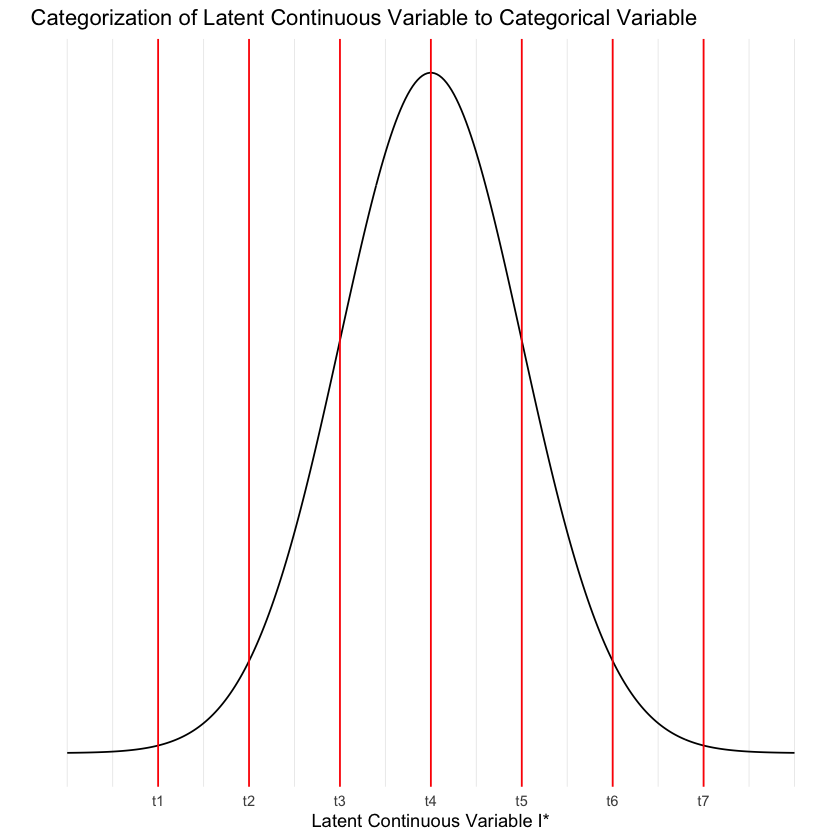

In [13]:
# Definire le soglie
thresholds <- c(-3, -2, -1, 0, 1, 2, 3)

# Creare un dataframe per la curva normale
x_values <- seq(-4, 4, length.out = 300)
y_values <- dnorm(x_values)
curve_data <- data.frame(x = x_values, y = y_values)

# Creare il plot
ggplot(curve_data, aes(x = x, y = y)) +
    geom_line() +
    geom_vline(xintercept = thresholds, col = "red") +
    scale_y_continuous(breaks = NULL) +
    scale_x_continuous(breaks = thresholds, labels = c("t1", "t2", "t3", "t4", "t5", "t6", "t7")) +
    labs(
        title = "Categorization of Latent Continuous Variable to Categorical Variable",
        x = "Latent Continuous Variable I*",
        y = ""
    ) +
    theme_minimal()


La categorizzazione di I* per produrre dati su scala Likert è soggetta a errori di misurazione e campionamento. Come sottolineato da O'Brien (1985), questo processo può produrre (1) errore di categorizzazione risultante dalla divisione della scala continua nella scala categoriale, e (2) errore di trasformazione risultante da categorie di larghezze disuguali. Pertanto, le soglie dovrebbero essere stimate insieme a tutti gli altri parametri nel modello di equazioni strutturali.

### Modellazione di Variabili Categoriali nei Modelli SEM

Quando si modellano variabili categoriali ordinate in SEM, l'approccio comune è quello di collegarle a una variabile latente sottostante, denominata I*. Questa variabile rappresenta una sorta di "propensione nascosta" che determina le risposte osservate nelle variabili categoriali.  

Ad esempio, la seguente equazione modella la variabile latente I* utilizzando una serie di p predittori (x1, x2, ..., xp). Ogni predittore ha un effetto, misurato dai coefficienti β1, β2, ..., βP:

$$ 
I^*_i = \beta_0 + \beta_1 x_{1i} + \dots + \beta_P x_{Pi} + e_i.
$$

Qui, $ I^*_i $ rappresenta la propensione latente per l'i-esimo osservatore o risposta. $ \beta_0 $ è un termine costante (intercetta), mentre $ \beta_1, \dots, \beta_P $ sono i coefficienti che quantificano l'effetto di ciascun predittore sul livello della propensione latente. Infine, $ e_i $ è il termine di errore che cattura le variazioni non spiegate dai predittori.

Quando la variabile categoriale I è un indicatore di misurazione di un fattore latente ($\xi$) in un modello fattoriale confermativo, l'equazione si semplifica:

$$ 
I^*_i = \beta_0 + \beta_1 \xi_i + e_i.
$$

Qui, $ \beta_1 $ è il carico fattoriale, che misura quanto fortemente il fattore latente $\xi$ influisce sulla variabile latente I*. Questa equazione è strutturata in modo simile a quelle utilizzate per modellare indicatori di misurazione continui in SEM.

Questo approccio di modellazione riflette la teoria che le risposte categoriali osservate possono essere viste come manifestazioni esterne di una propensione latente interna. L'uso dei minimi quadrati ponderati (WLS) come metodo di stima è appropriato per questo tipo di modellazione. Tuttavia, è fondamentale ricordare che modellare risposte categoriali ordinate può richiedere passaggi aggiuntivi per gestire accuratamente la natura ordinale dei dati. Questi dettagli aggiuntivi saranno discussi nelle sezioni successive.

### Adattamento del Modello con `lmer`

Specifichiamo il modello nel modo seguente:

In [14]:
model1 <- '
  etoh =~ y1 + y2 + y3 + y4 + y5 + y6
'

Nel modellare i dati utilizzando scale ordinali, `lavaan` adotta un approccio mirato che considera specificamente la natura dei dati categoriali. Questo viene fatto attraverso l'impiego dello stimatore WLSMV (Weighted Least Squares Mean and Variance Adjusted). In questo contesto, la stima dei parametri avviene mediante l'utilizzo dei minimi quadrati ponderati diagonalmente (DWLS), un metodo che si concentra sull'utilizzo delle componenti diagonali della matrice di peso. Questa scelta rende lo stimatore particolarmente efficace nel trattare dati non normali.

Una delle caratteristiche salienti dello stimatore WLSMV è il calcolo di errori standard robusti. Questi vengono determinati con una metodologia che assicura l'affidabilità delle stime, anche quando i dati non rispettano le classiche assunzioni di normalità. Inoltre, le statistiche di test generate da WLSMV sono opportunamente aggiustate per riflettere variazioni nella media e nella varianza dei dati. Tale aggiustamento è fondamentale per garantire l'accuratezza e la validità delle statistiche di test, soprattutto in contesti dove la distribuzione dei dati si discosta dalla normalità.

In sintesi, `lavaan` propone una metodologia avanzata per la modellazione di dati categoriali, sfruttando lo stimatore WLSMV che si adatta efficacemente alle specificità di questi dati. Ciò si traduce in stime precise e statistiche di test attendibili, rendendo `lavaan` uno strumento molto adeguato per l'analisi di dati categoriali complessi.

In [15]:
fit1 <- cfa(
  model1, 
  data = d1, 
  ordered = names(d1), 
  estimator = "WLSMVS", 
  mimic = "mplus"
)

Esaminiamo la soluzione ottenuta:

In [16]:
out = summary(fit1, fit.measures = TRUE)
print(out)

lavaan 0.6.17 ended normally after 16 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        12

  Number of observations                           750

Model Test User Model:
                                                  Standard      Scaled
  Test Statistic                                     5.651       9.540
  Degrees of freedom                                     9           9
  P-value (Chi-square)                               0.774       0.389
  Scaling correction factor                                      0.592
    mean and variance adjusted correction (WLSMV)                     

Model Test Baseline Model:

  Test statistic                              1155.845     694.433
  Degrees of freedom                                15           9
  P-value                                        0.000       0.000
  Scaling correction factor                      

Si presti particolare attenzione alla seguente porzione dell'output:

```bash
                   Estimate  Std.Err  z-value  P(>|z|)
    y1|t1            -0.759    0.051  -14.890    0.000
    y2|t1            -0.398    0.047   -8.437    0.000
    y3|t1            -1.244    0.061  -20.278    0.000
    y4|t1            -0.795    0.051  -15.436    0.000
    y5|t1            -0.384    0.047   -8.148    0.000
    y6|t1            -0.818    0.052  -15.775    0.000
```

In questa porzione dell'output di `lavaan` sono presentati i risultati per le "soglie" (thresholds) relative alle variabili categoriali ordinate utilizzate nel modello SEM. Ecco una spiegazione dettagliata:

1. **Thresholds (Soglie)**:
   - Ogni soglia rappresenta un punto di cutoff lungo la variabile continua latente (indicata in precedenza come I*), che determina le categorie della variabile categoriale osservata.
   - Nell'output, `y1|t1`, `y2|t1`, ecc., rappresentano soglie per le variabili rispettive (y1, y2, ..., y6). Il termine "t1" si riferisce alla prima soglia per ciascuna di queste variabili.

2. **Estimate (Stima)**:
   - Questi valori indicano la posizione della soglia sulla scala della variabile continua latente. Per esempio, la soglia per y1 è a -0.759. Questo significa che la divisione tra le prime due categorie di y1 si verifica a -0.759 sulla scala della variabile latente.

3. **Std.Err (Errore Standard)**:
   - L'errore standard della stima di ogni soglia. Ad esempio, per y1, l'errore standard è 0.051. Questo offre un'idea della variabilità o incertezza nella stima della soglia.

4. **z-value**:
   - Il valore z indica il rapporto tra la stima della soglia e il suo errore standard. Un valore z elevato suggerisce che la stima della soglia è significativamente diversa da zero (ovvero, la soglia è ben definita). Per esempio, per y1, il valore z è -14.890, che è statisticamente significativo.

5. **P(>|z|)**:
   - Il p-value associato al valore z. Un p-value basso (ad esempio, 0.000) indica che la stima della soglia è statisticamente significativa. Questo significa che possiamo essere abbastanza sicuri che la posizione della soglia sulla variabile latente sia accurata e non dovuta al caso.

In sintesi, queste soglie consentono di trasformare la variabile latente continua in una variabile categoriale osservata nel modello. La stima di queste soglie e la loro significatività statistica sono cruciali per comprendere come la variabile latente si traduce nelle categorie osservate. 

Confrontiamo ora la soluzione ottenuta con lo stimatore WLSMVS con quella ottenuta mediante lo stimatore ML.

In [17]:
fit2 <- cfa(
  model1, 
  data = d1
)

In [18]:
out <- summary(fit2, fit.measures = TRUE)
print(out)

lavaan 0.6.17 ended normally after 35 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        12

  Number of observations                           750

Model Test User Model:
                                                      
  Test statistic                                14.182
  Degrees of freedom                                 9
  P-value (Chi-square)                           0.116

Model Test Baseline Model:

  Test statistic                               614.305
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.991
  Tucker-Lewis Index (TLI)                       0.986

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2087.600
  Loglikelihood unrestricted model (H1)      -20

Si noti che la soluzione ottenuta mediante lo stimatore WLSMVS produce indici di bontà di adattamento migliori e errori standard dei parametri più piccoli.

## Considerazioni conclusive

In questo capitolo, abbiamo illustrato la modellazione delle equazioni strutturali per dati non normalmente distribuiti. È importante sottolineare che, nella pratica analitica SEM, la presenza di dati non normalmente distribuiti dovrebbe essere considerata la norma. Di conseguenza, l'uso della massima verosimiglianza robusta (ML robusta) è raccomandato ogni volta che ci siano dubbi sulla violazione dell'assunzione di normalità dei dati. 

Alcune considerazioni importanti meritano attenzione. Innanzitutto, benché tutte queste versioni robuste di ML producano errori standard robusti e una statistica di test robusta (o scalata), le stime dei parametri ottenute rimangono quelle della stima ML originale. In secondo luogo, la robustezza di questi aggiustamenti riguarda la violazione dell'assunzione di normalità, ma non la presenza di valori anomali, che è un argomento a sé stante. Terzo, la robustezza di questi aggiustamenti non si estende alla violazione delle specifiche del modello, che è un altro tema studiato nella letteratura SEM.

In questo capitolo, abbiamo inoltre introdotto lo stimatore WLSMV per dati categoriali, dimostrando che lo stimatore WLSMV è più efficiente con una stima dell'errore standard più piccola rispetto all'MLE di default e all'MLE robusta.

Va sottolineato che lo stimatore WLSMV è un metodo generale per dati categoriali in SEM, implementato nella maggior parte dei software, come ad esempio MPlus. WLSMV è una parola chiave generale che richiede simultaneamente lo stimatore DWLS e una statistica di test del chi-quadro aggiustata per media e varianza (MV). Pertanto, in `lavaan`, possiamo semplicemente utilizzare `lavaan(..., estimator = "WLSMV")`, che è equivalente a `lavaan(..., estimator = "DWLS", se = "robust.sem", test = "scaled.shifted")`.

Oltre al WLSMV, `lavaan` offre anche un estimatore sperimentale di massima verosimiglianza marginale (estimator = "MML"). L'MML può essere lento nella stima a causa dell'integrazione numerica associata a questo stimatore e più incline a problemi di convergenza. Un altro stimatore è l'ADF (estimator = "WLS"), che non fa alcuna specifica assunzione distributiva sui dati. Tuttavia, questo stimatore WLS richiede una dimensione del campione molto grande (N > 5000) affinché la stima dei parametri (cioè stime dei parametri, SE e statistiche di test) possa essere considerata affidabile.


## Session Info

In [19]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggokabeito_0.1.0   viridis_0.6.5      viridisLite_0.4.2  ggpubr_0.6.0      
 [5] ggExtra_0.10.1     bayesplot_1.11.1   gridExtra_2.3      patchwork_1.2.0   
 [9] semTools_0.5-6.920 semPlot_1.1.6      lavaan_0.6-17      psych_2.4.1       
[13] scales_1.3.0       markdown_1.12      knitr_1.45         lubridate_1.9.3   
[17] forcats_1.0.0      stringr_1.5.1      dplyr_1.1.4        purrr_1.0.2       
[21] readr_2.1.